In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
halo = pd.read_csv('horror_movies_cleaned_with_genre.csv')
halo.shape
halo.head(10)

,title,release_country,movie_rating,review_rating,plot,locations,release_date,release_year,runtime_in_min,main_language,multi_language,main_genre,multi_genre
0,Gut (2012),USA,NaN,3.9,"Directed by Elias. With Jason Vail, Nicholas W...","New York, USA",2012-10-26,2012,91.0,English,False,Drama,True
1,The Haunting of Mia Moss (2017),USA,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",NaN,2017-01-13,2017,NaN,English,False,Horror,False
2,Sleepwalking (2017),Canada,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...","Sudbury, Ontario, Canada",2017-10-21,2017,NaN,English,False,Horror,False
3,Treasure Chest of Horrors II (2013),USA,NOT RATED,3.7,"Directed by M. Kelley, Shawn C. Phillips, Alex...","Baltimore, Maryland, USA",2013-04-23,2013,82.0,English,False,Comedy,True
4,Infidus (2015),USA,NaN,5.8,"Directed by Giulio De Santi. With Bonini Mino,...",NaN,2015-04-10,2015,80.0,Italian,False,Crime,True
5,In Extremis (2017),UK,NaN,NaN,"Directed by Steve Stone. With David O'Hara, Is...",NaN,NaN,2017,93.0,English,False,Horror,True
6,Ghostlight (2013),USA,NOT RATED,5.1,"Directed by Jeff Ferrell. With Eden Campbell, ...",NaN,2014-06-03,2014,90.0,English,False,Drama,True
7,Parasyte: Part 2 (2015),Japan,NaN,6.5,Directed by Takashi Yamazaki. With ShÃ´ta Some...,"Tokyo, Japan",2015-04-25,2015,117.0,Japanese,False,Action,True
8,Stranger in the House (2015),Spain,PG-13,4.6,Directed by Devon Gummersall. With Annabella S...,"Warwick, New York, USA",2017-05-28,2017,90.0,English,False,Horror,True
9,Tutak Tutak Tutiya (2016),India,NaN,5.4,"Directed by Vijay. With Tamannaah Bhatia, Kari...",NaN,2016-10-07,2016,138.0,Hindi,False,Comedy,True


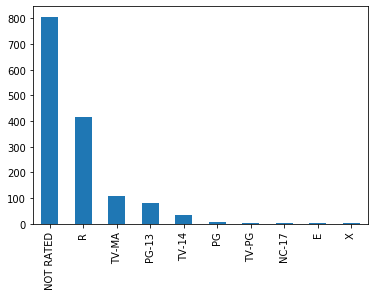

In [3]:
halo['movie_rating'].value_counts().plot(kind = 'bar')

In [4]:
halo.head(5)

,title,release_country,movie_rating,review_rating,plot,locations,release_date,release_year,runtime_in_min,main_language,multi_language,main_genre,multi_genre
0,Gut (2012),USA,NaN,3.9,"Directed by Elias. With Jason Vail, Nicholas W...","New York, USA",2012-10-26,2012,91.0,English,False,Drama,True
1,The Haunting of Mia Moss (2017),USA,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",NaN,2017-01-13,2017,NaN,English,False,Horror,False
2,Sleepwalking (2017),Canada,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...","Sudbury, Ontario, Canada",2017-10-21,2017,NaN,English,False,Horror,False
3,Treasure Chest of Horrors II (2013),USA,NOT RATED,3.7,"Directed by M. Kelley, Shawn C. Phillips, Alex...","Baltimore, Maryland, USA",2013-04-23,2013,82.0,English,False,Comedy,True
4,Infidus (2015),USA,NaN,5.8,"Directed by Giulio De Santi. With Bonini Mino,...",NaN,2015-04-10,2015,80.0,Italian,False,Crime,True


In [5]:
#Created dummy code for necessary columns, generally for dumming coding variable level minus 1 number of columns we create, drop_first function helps us to do it automatically. 
dummies = pd.get_dummies(halo,columns = ['multi_language','main_genre', 'multi_genre', 'main_language', 'movie_rating' ], drop_first = True)
halo5 = pd.concat([halo, dummies], axis = 1)
print(list(halo5.columns))

['title', 'release_country', 'movie_rating', 'review_rating', 'plot', 'locations', 'release_date', 'release_year', 'runtime_in_min', 'main_language', 'multi_language', 'main_genre', 'multi_genre', 'title', 'release_country', 'review_rating', 'plot', 'locations', 'release_date', 'release_year', 'runtime_in_min', 'multi_language_True', 'main_genre_ Adventure', 'main_genre_ Animation', 'main_genre_ Biography', 'main_genre_ Comedy', 'main_genre_ Crime', 'main_genre_ Drama', 'main_genre_ Family', 'main_genre_ Fantasy', 'main_genre_ History', 'main_genre_ Horror', 'multi_genre_True', 'main_language_Albanian', 'main_language_Arabic', 'main_language_Basque', 'main_language_Bengali', 'main_language_Bulgarian', 'main_language_Cantonese', 'main_language_Catalan', 'main_language_Chinese', 'main_language_Czech', 'main_language_Danish', 'main_language_Divehi', 'main_language_Dutch', 'main_language_English', 'main_language_Filipino', 'main_language_Finnish', 'main_language_Flemish', 'main_language_Fr

In [6]:
from dateparser import parse
import dateparser
import datetime


In [7]:
halo5['multi_language'].head()

0    False
1    False
2    False
3    False
4    False
Name: multi_language, dtype: bool

In [8]:
day_of_month =  halo5['release_year'].astype(int)

In [9]:
halo_date = halo['release_date']. str.split('-', expand = True).rename(columns = lambda x: "Date"+str(x+1))
halo_date = halo_date.drop(['Date1'], axis = 1)

halo_date['release_month'] = halo_date['Date2']
halo_date['release_day'] = halo_date['Date3']
halode_date = halo_date.drop(['Date2', 'Date3'], axis = 1, inplace= True )
halo5 = pd.concat([halo5, halo_date], axis = 1)
print(list(halo5.columns))

['title', 'release_country', 'movie_rating', 'review_rating', 'plot', 'locations', 'release_date', 'release_year', 'runtime_in_min', 'main_language', 'multi_language', 'main_genre', 'multi_genre', 'title', 'release_country', 'review_rating', 'plot', 'locations', 'release_date', 'release_year', 'runtime_in_min', 'multi_language_True', 'main_genre_ Adventure', 'main_genre_ Animation', 'main_genre_ Biography', 'main_genre_ Comedy', 'main_genre_ Crime', 'main_genre_ Drama', 'main_genre_ Family', 'main_genre_ Fantasy', 'main_genre_ History', 'main_genre_ Horror', 'multi_genre_True', 'main_language_Albanian', 'main_language_Arabic', 'main_language_Basque', 'main_language_Bengali', 'main_language_Bulgarian', 'main_language_Cantonese', 'main_language_Catalan', 'main_language_Chinese', 'main_language_Czech', 'main_language_Danish', 'main_language_Divehi', 'main_language_Dutch', 'main_language_English', 'main_language_Filipino', 'main_language_Finnish', 'main_language_Flemish', 'main_language_Fr

In [10]:

halo_reg = halo5[['review_rating','runtime_in_min','main_language_Albanian','multi_language_True', 'multi_genre_True', 'main_language_Arabic', 'main_language_Basque', 'main_language_Bengali', 'main_language_Bulgarian', 'main_language_Cantonese', 'main_language_Catalan', 'main_language_Chinese', 'main_language_Czech', 'main_language_Danish', 'main_language_Divehi', 'main_language_Dutch', 'main_language_English', 'main_language_Filipino', 'main_language_Finnish', 'main_language_Flemish', 'main_language_French', 'main_language_German', 'main_language_Greek', 'main_language_Greenlandic', 'main_language_Hebrew', 'main_language_Hindi', 'main_language_Hungarian', 'main_language_Icelandic', 'main_language_Indonesian', 'main_language_Italian', 'main_language_Japanese', 'main_language_Kannada', 'main_language_Korean', 'main_language_Lao', 'main_language_Latvian', 'main_language_Malay', 'main_language_Malayalam', 'main_language_Mandarin', 'main_language_Marathi', 'main_language_None', 'main_language_Norwegian', 'main_language_Persian', 'main_language_Polish', 'main_language_Portuguese', 'main_language_Romanian', 'main_language_Russian', 'main_language_Serbian', 'main_language_Sinhalese', 'main_language_Slovak', 'main_language_Slovenian', 'main_language_Spanish', 'main_language_Swedish', 'main_language_Tamil', 'main_language_Telugu', 'main_language_Thai', 'main_language_Turkish', 'main_language_Urdu', 'main_language_Vietnamese', 'movie_rating_NC-17', 'movie_rating_NOT RATED', 'movie_rating_PG', 'movie_rating_PG-13', 'movie_rating_R', 'movie_rating_TV-14', 'movie_rating_TV-MA', 'movie_rating_TV-PG', 'movie_rating_X', 'main_genre_ Adventure', 'main_genre_ Animation', 'main_genre_ Biography', 'main_genre_ Comedy', 'main_genre_ Crime', 'main_genre_ Drama', 'main_genre_ Family', 'main_genre_ Fantasy', 'main_genre_ History', 'main_genre_ Horror']]
halo_reg.head()

,review_rating,review_rating,runtime_in_min,runtime_in_min,main_language_Albanian,multi_language_True,multi_genre_True,main_language_Arabic,main_language_Basque,main_language_Bengali,...,main_genre_ Adventure,main_genre_ Animation,main_genre_ Biography,main_genre_ Comedy,main_genre_ Crime,main_genre_ Drama,main_genre_ Family,main_genre_ Fantasy,main_genre_ History,main_genre_ Horror
0,3.9,3.9,91.0,91.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.7,3.7,82.0,82.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5.8,5.8,80.0,80.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
halo_reg = halo_reg.loc[:, ~ halo_reg.columns.duplicated()]
halo_reg.to_csv(r'C:\Users\burhan\Desktop\Halloween_Contest\halo_reg.csv')

In [12]:
print(list(halo_reg.columns))

['review_rating', 'runtime_in_min', 'main_language_Albanian', 'multi_language_True', 'multi_genre_True', 'main_language_Arabic', 'main_language_Basque', 'main_language_Bengali', 'main_language_Bulgarian', 'main_language_Cantonese', 'main_language_Catalan', 'main_language_Chinese', 'main_language_Czech', 'main_language_Danish', 'main_language_Divehi', 'main_language_Dutch', 'main_language_English', 'main_language_Filipino', 'main_language_Finnish', 'main_language_Flemish', 'main_language_French', 'main_language_German', 'main_language_Greek', 'main_language_Greenlandic', 'main_language_Hebrew', 'main_language_Hindi', 'main_language_Hungarian', 'main_language_Icelandic', 'main_language_Indonesian', 'main_language_Italian', 'main_language_Japanese', 'main_language_Kannada', 'main_language_Korean', 'main_language_Lao', 'main_language_Latvian', 'main_language_Malay', 'main_language_Malayalam', 'main_language_Mandarin', 'main_language_Marathi', 'main_language_None', 'main_language_Norwegian'

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn import metrics


In [14]:
halo_reg.dropna(inplace=True)
x = halo_reg[['runtime_in_min','multi_language_True','multi_genre_True', 'main_language_English', 'movie_rating_NC-17', 'movie_rating_NOT RATED', 'movie_rating_PG', 'movie_rating_PG-13', 'movie_rating_R', 'movie_rating_TV-14', 'movie_rating_TV-MA', 'movie_rating_TV-PG', 'movie_rating_X', 'main_genre_ Adventure', 'main_genre_ Animation', 'main_genre_ Biography', 'main_genre_ Comedy', 'main_genre_ Crime', 'main_genre_ Drama', 'main_genre_ Family', 'main_genre_ Fantasy', 'main_genre_ History', 'main_genre_ Horror' ]]
y = halo_reg['review_rating']
# I selected only few general columns for prediction otherwise model may overfit. 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=0)
x_train.dropna(inplace=True)
x_test.dropna(inplace=True)
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

In [17]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1618, 23) (1618,)
(1080, 23) (1080,)


In [18]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [19]:
predictions = lm.predict(x_test)
predictions

array([4.91264237, 6.16129801, 4.66674008, ..., 5.82841101, 4.89031775,
       5.19483958])

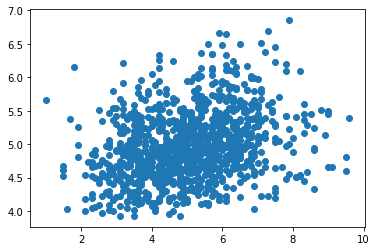

In [20]:
plt.scatter(y_test, predictions)

In [21]:
#hardly we can see an accuracy 


In [22]:
print("Score:", lm.score(x_test, y_test))

Score: 0.0731528892801192


In [23]:
metrics.mean_absolute_error(y_test, predictions)

1.0692544122693848

In [24]:
metrics.mean_squared_error(y_test, predictions)

1.8417724756612852

In [25]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.3571191825559334

In [26]:
a = halo_reg['review_rating']
max(a)
min(a)

1.0

In [27]:
halo_reg1 = halo_reg
halo_reg1.head()

,review_rating,runtime_in_min,main_language_Albanian,multi_language_True,multi_genre_True,main_language_Arabic,main_language_Basque,main_language_Bengali,main_language_Bulgarian,main_language_Cantonese,...,main_genre_ Adventure,main_genre_ Animation,main_genre_ Biography,main_genre_ Comedy,main_genre_ Crime,main_genre_ Drama,main_genre_ Family,main_genre_ Fantasy,main_genre_ History,main_genre_ Horror
0,3.9,91.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.7,82.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5.8,80.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,5.1,90.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,6.5,117.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# what if categorize review rating from 1-10 as ordinal categories ? 
def ordinal (series):
    if series >= 0 and series < 1:
        return 0
    elif series  >=1 and series < 2 :
        return 1
    elif series >= 2 and series < 3:
        return 2
    elif series >= 3 and series < 4:
        return 3
    elif series >= 4 and series < 5:
        return 4
    elif series >= 5 and series < 6:
        return 5
    elif series >= 6 and series < 7:
        return 6
    elif series >= 7 and series < 8:
        return 7
    elif series >= 8 and series < 9:
        return 8
    elif series >= 9 and series < 10:
        return 9

halo_reg1["review_Ordinal"] = halo_reg['review_rating'].apply(ordinal)
halo_reg1.head()

,review_rating,runtime_in_min,main_language_Albanian,multi_language_True,multi_genre_True,main_language_Arabic,main_language_Basque,main_language_Bengali,main_language_Bulgarian,main_language_Cantonese,...,main_genre_ Animation,main_genre_ Biography,main_genre_ Comedy,main_genre_ Crime,main_genre_ Drama,main_genre_ Family,main_genre_ Fantasy,main_genre_ History,main_genre_ Horror,review_Ordinal
0,3.9,91.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,3.7,82.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
4,5.8,80.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
6,5.1,90.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
7,6.5,117.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [29]:
halo_reg1 = halo_reg1.drop(['review_rating'], axis = 1)
print(list(halo_reg1))

['runtime_in_min', 'main_language_Albanian', 'multi_language_True', 'multi_genre_True', 'main_language_Arabic', 'main_language_Basque', 'main_language_Bengali', 'main_language_Bulgarian', 'main_language_Cantonese', 'main_language_Catalan', 'main_language_Chinese', 'main_language_Czech', 'main_language_Danish', 'main_language_Divehi', 'main_language_Dutch', 'main_language_English', 'main_language_Filipino', 'main_language_Finnish', 'main_language_Flemish', 'main_language_French', 'main_language_German', 'main_language_Greek', 'main_language_Greenlandic', 'main_language_Hebrew', 'main_language_Hindi', 'main_language_Hungarian', 'main_language_Icelandic', 'main_language_Indonesian', 'main_language_Italian', 'main_language_Japanese', 'main_language_Kannada', 'main_language_Korean', 'main_language_Lao', 'main_language_Latvian', 'main_language_Malay', 'main_language_Malayalam', 'main_language_Mandarin', 'main_language_Marathi', 'main_language_None', 'main_language_Norwegian', 'main_language_

In [30]:
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
review = halo_reg1.drop('review_Ordinal', axis=1)

In [33]:
scaler = StandardScaler()
scaler.fit(review)
scaledVariables = scaler.transform(review)
reviewScaled = pd.DataFrame(scaledVariables, columns=halo_reg1.columns[:-1])

In [34]:
x = reviewScaled
y = halo_reg1['review_Ordinal']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [37]:
print(confusion_matrix(y_test, pred))

[[ 0  0  1  4  2  1  0  0  0]
 [ 3  3  9 15 13  6  1  1  0]
 [ 1  7 35 35 25 19  7  1  0]
 [ 4 20 36 49 50 30  3  2  0]
 [ 2 17 41 57 70 35 10  3  1]
 [ 2  5 19 31 36 27  8  2  1]
 [ 2  2  6 12  7  7  7  1  1]
 [ 0  1  2  1  2  2  3  1  0]
 [ 0  0  1  2  0  0  0  0  0]]


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.05      0.06      0.06        51
           3       0.23      0.27      0.25       130
           4       0.24      0.25      0.24       194
           5       0.34      0.30      0.32       236
           6       0.21      0.21      0.21       131
           7       0.18      0.16      0.17        45
           8       0.09      0.08      0.09        12
           9       0.00      0.00      0.00         3

    accuracy                           0.24       810
   macro avg       0.15      0.15      0.15       810
weighted avg       0.24      0.24      0.24       810



In [39]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.04      0.04      0.04        51
           3       0.17      0.21      0.18       130
           4       0.27      0.43      0.33       194
           5       0.36      0.29      0.32       236
           6       0.24      0.17      0.20       131
           7       0.45      0.11      0.18        45
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.26       810
   macro avg       0.17      0.14      0.14       810
weighted avg       0.26      0.26      0.25       810



In [41]:
# KNN gives 26% weighted average prediction (better than our linear model)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
x = review
y = halo_reg1['review_Ordinal']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [45]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [46]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))

[[ 0  0  2  3  2  0  1  0  1]
 [ 1  8 15 16  5  1  1  0  0]
 [ 2 16 44 42 22 16  3  1  0]
 [ 1 12 49 71 31 19  2  1  2]
 [ 2 22 33 72 38 32  5  6  2]
 [ 1  6 23 33 43 29  9  1  0]
 [ 2  4 15  7  6  6  1  2  0]
 [ 0  1  4  5  4  1  2  0  0]
 [ 0  0  2  0  1  0  0  0  0]]


In [47]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.12      0.17      0.14        47
           3       0.24      0.30      0.26       146
           4       0.29      0.38      0.32       188
           5       0.25      0.18      0.21       212
           6       0.28      0.20      0.23       145
           7       0.04      0.02      0.03        43
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00         3

    accuracy                           0.24       810
   macro avg       0.13      0.14      0.13       810
weighted avg       0.23      0.24      0.23       810



In [48]:
#Not better than KNN

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
#RF 

In [51]:
forest = RandomForestClassifier(n_estimators=500, random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [52]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 0  0  2  2  2  1  1  0  1]
 [ 0  4  8 14 17  3  1  0  0]
 [ 0  9 33 43 38 17  5  1  0]
 [ 0  7 39 67 44 25  3  2  1]
 [ 0 12 25 68 56 38  7  5  1]
 [ 0  5 17 35 45 34  9  0  0]
 [ 1  4  9  8  6  9  4  2  0]
 [ 0  1  1  4  4  0  4  3  0]
 [ 0  0  2  1  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.10      0.09      0.09        47
           3       0.24      0.23      0.23       146
           4       0.28      0.36      0.31       188
           5       0.26      0.26      0.26       212
           6       0.27      0.23      0.25       145
           7       0.12      0.09      0.10        43
           8       0.23      0.18      0.20        17
           9       0.00      0.00      0.00         3

    accuracy                           0.25       810
   macro avg       0.17      0.16      0.16       810
weighted avg       0.24      0.25      0.24       810



In [53]:
#Still not better than KNN

In [54]:
# optimization 

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500, 30]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.24567901234567902
4 : 0.21604938271604937
5 : 0.20987654320987653
8 : 0.22469135802469137
10 : 0.23703703703703705
20 : 0.2506172839506173
50 : 0.24074074074074073
75 : 0.24074074074074073
100 : 0.24444444444444444
250 : 0.24691358024691357
500 : 0.2506172839506173
30 : 0.24938271604938272


In [57]:
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [58]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [59]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [60]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 60}

In [61]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, max_features="auto", max_depth=60)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=60, min_samples_leaf=4, n_estimators=10)

In [62]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[  0   0   1   3   3   2   0   0   0]
 [  0   0   3  37   7   0   0   0   0]
 [  0   0   7  89  43   7   0   0   0]
 [  0   0  11 104  67   6   0   0   0]
 [  0   0   7  91  93  21   0   0   0]
 [  0   0   1  44  83  16   1   0   0]
 [  0   0   0  15  20   7   1   0   0]
 [  0   0   1  10   6   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        47
           3       0.23      0.05      0.08       146
           4       0.26      0.55      0.36       188
           5       0.29      0.44      0.35       212
           6       0.27      0.11      0.16       145
           7       0.50      0.02      0.04        43
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00         3

    accuracy                           0.27       810
   macro avg       0.17      0.13      0.11       81

In [63]:
#after optimization still can not catch 26% KNN accuracy 

In [64]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

runtime_in_min            0.469001
main_language_Albanian    0.000000
multi_language_True       0.031039
multi_genre_True          0.041163
main_language_Arabic      0.000000
                            ...   
main_genre_ Drama         0.023083
main_genre_ Family        0.000000
main_genre_ Fantasy       0.006898
main_genre_ History       0.000000
main_genre_ Horror        0.056395
Length: 76, dtype: float64

In [65]:
# movie run time is the most  important feature to predict review rating 